In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12


## 1. Read & Sturcture Data

In [100]:
YEAR = [2021, 2022, 2023, 2024]

data = {}

for y in YEAR:
    application_arrival_path = f'Inkomna ansökningar om asyl {y}.xlsx'
    application_settled_path = f'Avgjorda asylärenden {y}.xlsx'

    # -------- APPLICATIONS BY MEMBERSHIP COUNTRY --------
    if y == 2021:
        application_arrival_df = pd.read_excel(application_arrival_path, sheet_name='Medborgarskap, persontyp', skiprows=1)
        application_settled_df = pd.read_excel(application_settled_path, sheet_name='Medborgarskap, första ansökan', skiprows=1)
    else:
        application_arrival_df = pd.read_excel(application_arrival_path, sheet_name='Medborgarskap, persontyp', skiprows=3)
        application_settled_df = pd.read_excel(application_settled_path, sheet_name='Medborgarskap, första ansökan', skiprows=3)

    # -------- FIRST TIME APPLICANTS --------
    application_arrival_firstTime_df = application_arrival_df.iloc[:, :5]   # first 5 columns
    application_arrival_firstTime_df = application_arrival_firstTime_df.sort_values(by='Totalt', ascending=False).reset_index(drop=True)
    application_arrival_firstTime_df = application_arrival_firstTime_df[['Medborgarskap', 'Totalt']]

    application_settled_firstTime_df = application_settled_df.iloc[:, :9]
    application_settled_firstTime_df = application_settled_firstTime_df.sort_values(by='Totalt', ascending=False).reset_index(drop=True)
    application_settled_firstTime_df = application_settled_firstTime_df[['Medborgarskap', 'Bifall', 'Avslag', 'Totalt']]

    # -------- UNDER TPD --------
    if y == 2021:
        # No TPD data for 2021
        all_applications_arrival_df = application_arrival_firstTime_df.copy()
        all_applications_settled_df = application_settled_firstTime_df.copy()
    else:   
        application_arrival_TPD_df = application_arrival_df.iloc[:, 12:18]   # first 5 columns
        application_arrival_TPD_df = application_arrival_TPD_df.sort_values(by='Totalt.2', ascending=False).reset_index(drop=True)
        application_arrival_TPD_df.columns = application_arrival_TPD_df.columns.str.replace(r'\..*$', '', regex=True)
        application_arrival_TPD_df = application_arrival_TPD_df[['Medborgarskap', 'Totalt']]

        application_settled_TPD_df = application_settled_df.iloc[:, 10:17]
        application_settled_TPD_df = application_settled_TPD_df.sort_values(by='Totalt.1', ascending=False).reset_index(drop=True)
        application_settled_TPD_df.columns = application_settled_TPD_df.columns.str.replace(r'\..*$', '', regex=True)
        application_settled_TPD_df = application_settled_TPD_df[['Medborgarskap', 'Bifall', 'Avslag', 'Totalt']]

        all_applications_arrival_df = application_arrival_firstTime_df.copy()
        all_applications_arrival_df = all_applications_arrival_df.merge(application_arrival_TPD_df, on='Medborgarskap', how='outer', suffixes=('', '.TPD'))

        all_applications_settled_df = application_settled_firstTime_df.copy()
        all_applications_settled_df = all_applications_settled_df.merge(application_settled_TPD_df, on='Medborgarskap', how='outer', suffixes=('', '.TPD'))

    data[y] = {
        'arrival': all_applications_arrival_df,
        'settled': all_applications_settled_df
    }

In [101]:
# -------- APPLICATIONS 2000-2020 --------
path = 'Asylsökande till Sverige 2000-2021.xlsx'
application_arrival_df_2000_2020 = pd.read_excel(path, sheet_name='Asylsökande', skiprows=11)
application_arrival_df_2000_2020 = application_arrival_df_2000_2020.drop(columns=['Summa', 'Andel av totalen', 2021])
application_arrival_df_2000_2020['Medborgarskap'] = application_arrival_df_2000_2020['Medborgarskap'].str.upper()
application_arrival_df_2000_2020.head()

,Medborgarskap,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,SYRIEN,335,441,541,666,411,392,433,440,551,...,640,7814,16317,30583,51338,5459,4718,2709,2649,1209
1,IRAK,3499,6206,5452,2700,1456,2330,8951,18559,6083,...,1633,1322,1476,2666,20858,2758,1887,1369,1054,783
2,AFGHANISTAN,374,593,527,811,903,435,594,609,784,...,4122,4755,3011,3104,41564,2969,1681,806,825,593
3,SOMALIA,260,525,1107,3069,905,422,1066,3349,3361,...,3981,5644,3901,4831,5465,1646,780,736,755,443
4,STATSLÖS,412,538,859,1787,1578,806,815,1312,1051,...,1109,2289,6921,7863,7716,1339,1201,766,880,376


In [102]:
# -------- SETTLED APPLICATIONS 2020 --------
applications_settled_df_2020 = pd.read_excel('Avgjorda asylärenden 2020.xlsx', sheet_name='Medborgarskap - Citizenship', skiprows=8)
applications_settled_df_2020 = applications_settled_df_2020.drop(columns=['Unnamed: 0'])

applications_settled_df_2020 = applications_settled_df_2020.rename(
    columns={
        'Avgjorda' : 'Totalt',
        'varav bifall': 'Bifall',
        'varav avslag': 'Avslag',
        ' Medborgarskap ' : 'Medborgarskap'
    }
)
applications_settled_df_2020 = applications_settled_df_2020[applications_settled_df_2020['Medborgarskap'] != ' Citizenship']
applications_settled_df_2020 = applications_settled_df_2020[['Medborgarskap', 'Bifall', 'Avslag', 'Totalt']]
applications_settled_df_2020.head()


,Medborgarskap,Bifall,Avslag,Totalt
1,AFGHANISTAN,366,424,932
2,ALBANIEN,7,272,324
3,ALGERIET,9,27,92
4,ANGOLA,3,15,21
5,ARGENTINA,NaN,4,5


## 2. Incoming Applications

In [103]:
df_wide = application_arrival_df_2000_2020.copy()
df_wide = df_wide.rename(columns={'Medborgarskap': 'Medborgarskap'})

df_long = df_wide.melt(
    id_vars='Medborgarskap',
    var_name='Year',
    value_name='total_all'
)

df_long['Year'] = df_long['Year'].astype(int)
df_long['total_all'] = df_long['total_all'].replace('-', 0)
df_long['Totalt.TPD'] = 0
df_long = df_long[['Year', 'Medborgarskap', 'total_all', 'Totalt.TPD']]

df_long.head()

,Year,Medborgarskap,total_all,Totalt.TPD
0,2000,SYRIEN,335.0,0
1,2000,IRAK,3499.0,0
2,2000,AFGHANISTAN,374.0,0
3,2000,SOMALIA,260.0,0
4,2000,STATSLÖS,412.0,0


In [104]:
frames = []
for y in YEAR:
    df = data[y]['arrival'].copy()
    df['Year'] = y

    # make sure TPD column exists also for 2021
    if 'Totalt.TPD' not in df.columns:
        df['Totalt.TPD'] = 0

    frames.append(df[['Year', 'Medborgarskap', 'Totalt', 'Totalt.TPD']])

arrival_panel = pd.concat(frames, ignore_index=True)
arrival_panel['total_all'] = arrival_panel['Totalt'].fillna(0) + arrival_panel['Totalt.TPD'].fillna(0)
arrival_panel = arrival_panel[['Year', 'Medborgarskap', 'total_all', 'Totalt.TPD']]
arrival_panel = arrival_panel[arrival_panel['Medborgarskap'] != 'Totalt']
arrival_panel.head()

,Year,Medborgarskap,total_all,Totalt.TPD
1,2021,AFGHANISTAN,1491.0,0.0
2,2021,SYRIEN,1276.0,0.0
3,2021,IRAK,932.0,0.0
4,2021,UKRAINA,523.0,0.0
5,2021,TURKIET,492.0,0.0


In [127]:
arrival_panel_full = pd.concat([df_long, arrival_panel], ignore_index=True)
top_countries = (
    arrival_panel_full.groupby('Medborgarskap')['total_all']
    .sum()
    .sort_values(ascending=False)
    .head(5)             # pick how many you want
    .index
)

arrival_top = arrival_panel_full[arrival_panel_full['Medborgarskap'].isin(top_countries)].reset_index(drop=True)
arrival_top_countries = arrival_top['Medborgarskap'].unique().tolist()
arrival_top

,Year,Medborgarskap,total_all,Totalt.TPD
0,2000,SYRIEN,335.0,0.0
1,2000,IRAK,3499.0,0.0
2,2000,AFGHANISTAN,374.0,0.0
3,2000,SOMALIA,260.0,0.0
4,2000,UKRAINA,110.0,0.0
...,...,...,...,...
120,2024,AFGHANISTAN,840.0,1.0
121,2024,IRAK,574.0,2.0
122,2024,SOMALIA,191.0,NaN
123,2024,SYRIEN,982.0,5.0


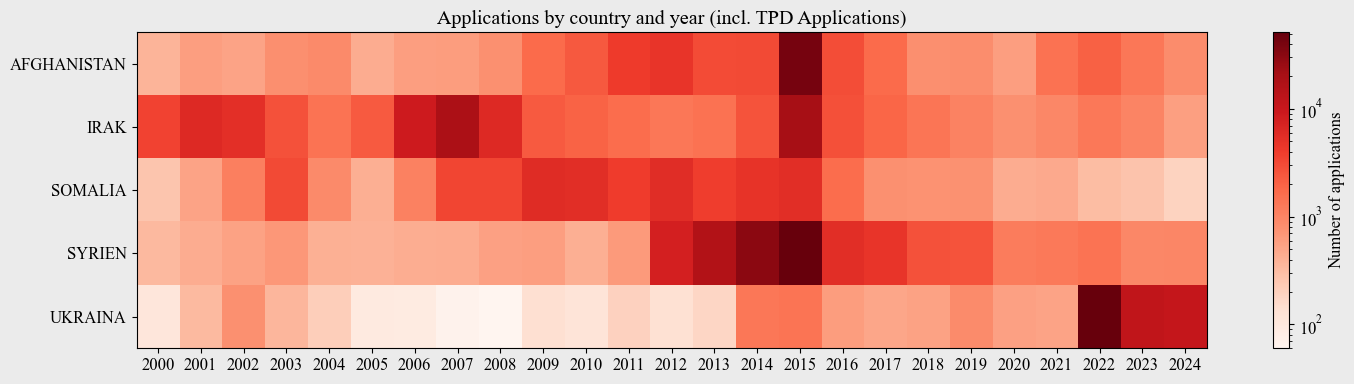

In [125]:
pivot = arrival_top.pivot(index='Medborgarskap', columns='Year', values='total_all')

plt.figure(figsize=(15,4), facecolor="#ebebeb")
plt.imshow(pivot, aspect='auto', cmap='Reds', norm=LogNorm())
plt.colorbar(label='Number of applications')
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.title('Applications by country and year (incl. TPD Applications)')
plt.tight_layout()
plt.show()


## 3. Settled Applications

In [107]:
df_settled_2020 = applications_settled_df_2020.copy()
df_settled_2020['Year'] = 2020
df_settled_2020['Bifall.TPD'] = 0
df_settled_2020['Avslag.TPD'] = 0
df_settled_2020['Totalt.TPD'] = 0
df_settled_2020['bifall_all'] = df_settled_2020['Bifall']
df_settled_2020['avslag_all'] = df_settled_2020['Avslag']
df_settled_2020['total_all'] = df_settled_2020['Totalt']

df_settled_2020 = df_settled_2020[['Year', 'Medborgarskap', 'Bifall', 'Avslag', 'Totalt', 'Bifall.TPD', 'Avslag.TPD', 'Totalt.TPD', 'bifall_all', 'avslag_all', 'total_all']]

df_settled_2020 = df_settled_2020[df_settled_2020['Medborgarskap'] != 'TOTALT']
df_settled_2020.head()

,Year,Medborgarskap,Bifall,Avslag,Totalt,Bifall.TPD,Avslag.TPD,Totalt.TPD,bifall_all,avslag_all,total_all
1,2020,AFGHANISTAN,366,424,932,0,0,0,366,424,932
2,2020,ALBANIEN,7,272,324,0,0,0,7,272,324
3,2020,ALGERIET,9,27,92,0,0,0,9,27,92
4,2020,ANGOLA,3,15,21,0,0,0,3,15,21
5,2020,ARGENTINA,NaN,4,5,0,0,0,NaN,4,5


In [108]:
frames = []
for y in YEAR:
    df = data[y]['settled'].copy()
    df['Year'] = y

    # make sure TPD column exists also for 2021
    if 'Totalt.TPD' not in df.columns:
        df['Bifall.TPD'] = 0
        df['Avslag.TPD'] = 0
        df['Totalt.TPD'] = 0

    frames.append(df[['Year', 'Medborgarskap', 'Bifall', 'Avslag', 'Totalt', 'Bifall.TPD', 'Avslag.TPD', 'Totalt.TPD']])

settled_panel = pd.concat(frames, ignore_index=True)
settled_panel['total_all'] = settled_panel['Totalt'].fillna(0) + settled_panel['Totalt.TPD'].fillna(0)
settled_panel['bifall_all'] = settled_panel['Bifall'].fillna(0) + settled_panel['Bifall.TPD'].fillna(0)
settled_panel['avslag_all'] = settled_panel['Avslag'].fillna(0) + settled_panel['Avslag.TPD'].fillna(0)

settled_panel = settled_panel[['Year', 'Medborgarskap', 'Bifall', 'Avslag', 'Totalt', 'Bifall.TPD', 'Avslag.TPD', 'Totalt.TPD', 'bifall_all', 'avslag_all', 'total_all']]
settled_panel = settled_panel[settled_panel['Medborgarskap'] != 'Totalt']
settled_panel.head()

,Year,Medborgarskap,Bifall,Avslag,Totalt,Bifall.TPD,Avslag.TPD,Totalt.TPD,bifall_all,avslag_all,total_all
1,2021,SYRIEN,772.0,140.0,1208.0,0.0,0.0,0.0,772.0,140.0,1208.0
2,2021,UZBEKISTAN,24.0,730.0,828.0,0.0,0.0,0.0,24.0,730.0,828.0
3,2021,IRAN,268.0,460.0,825.0,0.0,0.0,0.0,268.0,460.0,825.0
4,2021,IRAK,151.0,467.0,820.0,0.0,0.0,0.0,151.0,467.0,820.0
5,2021,AFGHANISTAN,340.0,211.0,772.0,0.0,0.0,0.0,340.0,211.0,772.0


In [128]:
settled_panel_full = pd.concat([df_settled_2020, settled_panel], ignore_index=True)
top_countries = (
    settled_panel_full.groupby('Medborgarskap')['total_all']
    .sum()
    .sort_values(ascending=False)
    .head(5)             # pick how many you want
    .index
)

settled_top = settled_panel_full[settled_panel_full['Medborgarskap'].isin(arrival_top_countries)].reset_index(drop=True)
settled_top

,Year,Medborgarskap,Bifall,Avslag,Totalt,Bifall.TPD,Avslag.TPD,Totalt.TPD,bifall_all,avslag_all,total_all
0,2020,AFGHANISTAN,366,424,932,0.0,0.0,0.0,366,424,932
1,2020,IRAK,231,883,1385,0.0,0.0,0.0,231,883,1385
2,2020,SOMALIA,222,321,755,0.0,0.0,0.0,222,321,755
3,2020,SYRIEN,1422,455,2255,0.0,0.0,0.0,1422,455,2255
4,2020,UKRAINA,5,456,575,0.0,0.0,0.0,5,456,575
5,2021,SYRIEN,772.0,140.0,1208.0,0.0,0.0,0.0,772.0,140.0,1208.0
6,2021,IRAK,151.0,467.0,820.0,0.0,0.0,0.0,151.0,467.0,820.0
7,2021,AFGHANISTAN,340.0,211.0,772.0,0.0,0.0,0.0,340.0,211.0,772.0
8,2021,UKRAINA,12.0,488.0,596.0,0.0,0.0,0.0,12.0,488.0,596.0
9,2021,SOMALIA,136.0,205.0,489.0,0.0,0.0,0.0,136.0,205.0,489.0


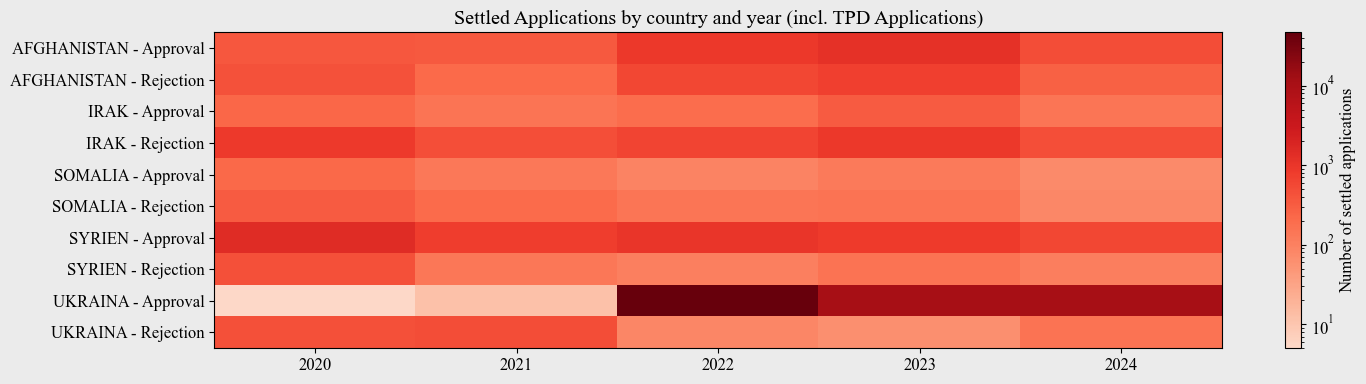

In [130]:
pivot_bifall = settled_top.pivot(index='Medborgarskap', columns='Year', values='bifall_all')
pivot_avslag = settled_top.pivot(index='Medborgarskap', columns='Year', values='avslag_all')

bifall_long = pivot_bifall.reset_index().melt(id_vars='Medborgarskap', var_name='Year', value_name='Value')
bifall_long['Decision'] = 'Approval'

avslag_long = pivot_avslag.reset_index().melt(id_vars='Medborgarskap', var_name='Year', value_name='Value')
avslag_long['Decision'] = 'Rejection'

combined = pd.concat([bifall_long, avslag_long], ignore_index=True)
combined['CountryDecision'] = combined['Medborgarskap'] + ' - ' + combined['Decision']
pivot_combined = combined.pivot(index='CountryDecision', columns='Year', values='Value').fillna(0)

pivot_combined = pivot_combined.reindex(sorted(pivot_combined.index, key=lambda x: (x.split(' - ')[0], x.split(' - ')[1])), axis=0)

orig_cmap = plt.cm.Reds
truncated_cmap = mcolors.LinearSegmentedColormap.from_list(
    "RedsTrunc",
    orig_cmap(np.linspace(0.15, 1.0, 256))
)

plt.figure(figsize=(15, 4), facecolor="#ebebeb")
plt.imshow(pivot_combined, aspect='auto', cmap=truncated_cmap, norm=LogNorm())

plt.colorbar(label='Number of settled applications')
plt.xticks(range(len(pivot_combined.columns)), pivot_combined.columns)
plt.yticks(range(len(pivot_combined.index)), pivot_combined.index)

plt.title('Settled Applications by country and year (incl. TPD Applications)')
plt.tight_layout()
plt.show()

